In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = [15, 7]

experience_factor = 100

df = pd.read_excel(f"./data/final_data_experience_factor_{experience_factor}.xlsx").drop(
    columns=["Unnamed: 0"]
)

df["rank"] = df["peak MMR"].rank(ascending=False)
df["rank bin"] = pd.cut(df["rank"], list(range(0,8000, 200)))
df["elo bin"] = pd.cut(df["elo"], list(range(1100, 2800, 200)))
df["games played percentile"] = df["games played"].rank(pct=True)
df["games played bin"] = pd.cut(df["games played percentile"], [0, 0.25, 0.50, 0.75, 1])
df = df.sort_values(["elo bin", "games played bin"])

df

,player,elo,playrate,games played,current MMR,peak MMR,win rate,rank,elo bin,games played percentile,games played bin,rank bin
8,Player 8,1256.142857,4,69,2329.993906,2414.141336,42.028986,5222.0,"(1100, 1300]",0.232813,"(0.0, 0.25]","(5200, 5400]"
25,Player 25,1278.142857,1,43,2272.353615,2400.000000,27.906977,7484.5,"(1100, 1300]",0.031563,"(0.0, 0.25]","(7400, 7600]"
37,Player 37,1232.142857,7,66,2308.354000,2400.160046,39.393939,6845.0,"(1100, 1300]",0.205437,"(0.0, 0.25]","(6800, 7000]"
49,Player 49,1285.142857,2,53,2314.874285,2403.095264,37.735849,6421.0,"(1100, 1300]",0.092438,"(0.0, 0.25]","(6400, 6600]"
64,Player 64,1228.142857,5,61,2288.231585,2400.000000,36.065574,7484.5,"(1100, 1300]",0.159375,"(0.0, 0.25]","(7400, 7600]"
...,...,...,...,...,...,...,...,...,...,...,...,...
6837,Player 6837,2540.857143,13,130,2601.535009,2621.272243,60.769231,39.0,"(2500, 2700]",0.846875,"(0.75, 1.0]","(0, 200]"
6861,Player 6861,2610.000000,18,141,2633.147241,2652.044285,62.411348,12.0,"(2500, 2700]",0.946500,"(0.75, 1.0]","(0, 200]"
6926,Player 6926,2584.857143,14,135,2635.266406,2635.266406,62.222222,22.0,"(2500, 2700]",0.895188,"(0.75, 1.0]","(0, 200]"
7420,Player 7420,2663.000000,16,134,2667.985872,2668.769108,64.179104,5.0,"(2500, 2700]",0.885625,"(0.75, 1.0]","(0, 200]"


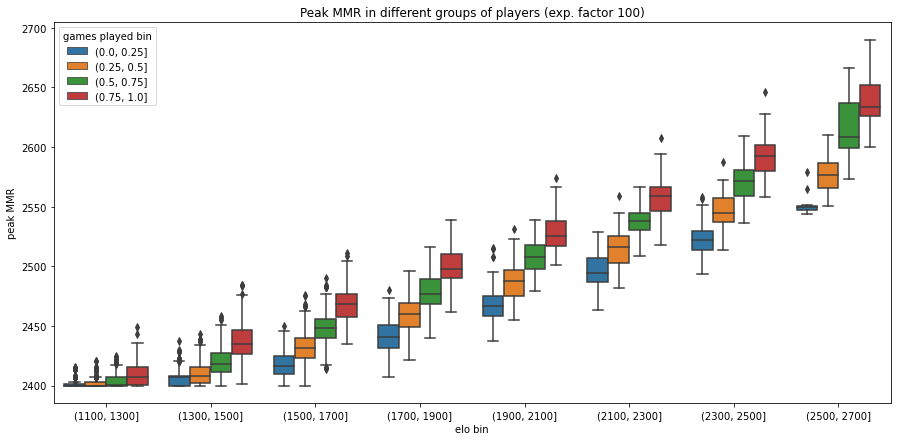

In [2]:
sns.boxplot(
    x="elo bin", y="peak MMR", hue="games played bin", data=df,
).set_title(f"Peak MMR in different groups of players (exp. factor {experience_factor})")
plt.savefig(f"./images/elo_vs_peakMMR_experience_factor_{experience_factor}.png")
plt.savefig(f"./images/elo_vs_peakMMR_experience_factor_{experience_factor}.svg")
plt.show()

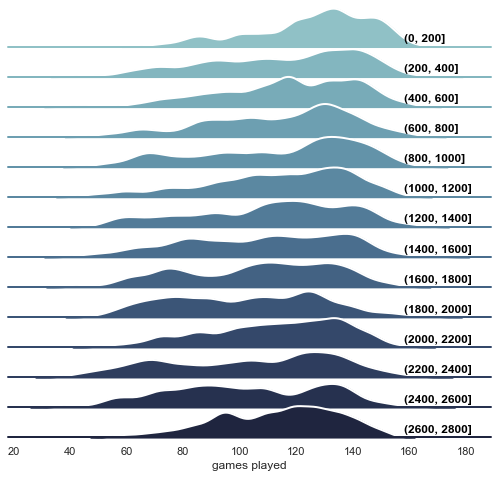

In [3]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Initialize the FacetGrid object
pal = sns.cubehelix_palette(14, rot=-0.25, light=0.7)
ridgeline_df = df[df["rank"]<=2800].copy(deep=True)
ridgeline_df["rank bin"].cat.remove_unused_categories(inplace=True)
# ridgeline_df["rank bin"] = ridgeline_df["rank bin"].astype("str")
g = sns.FacetGrid(
    ridgeline_df, row="rank bin", hue="rank bin", aspect=15, height=0.5, palette=pal
)

# Draw the densities in a few steps
g.map(
    sns.kdeplot,
    "games played",
    bw_adjust=0.5,
    clip_on=False,
    fill=True,
    alpha=1,
    linewidth=1.5,
)
g.map(sns.kdeplot, "games played", clip_on=False, color="w", lw=2, bw_adjust=0.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(
        0.82,
        0.2,
        label,
        fontweight="bold",
        color="black",
        ha="left",
        va="center",
        transform=ax.transAxes,
    )


g.map(label, "games played")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-0.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.savefig(f"./images/ridgeplot_experience_factor_{experience_factor}.png")
plt.savefig(f"./images/ridgeplot_experience_factor_{experience_factor}.svg")
plt.show()

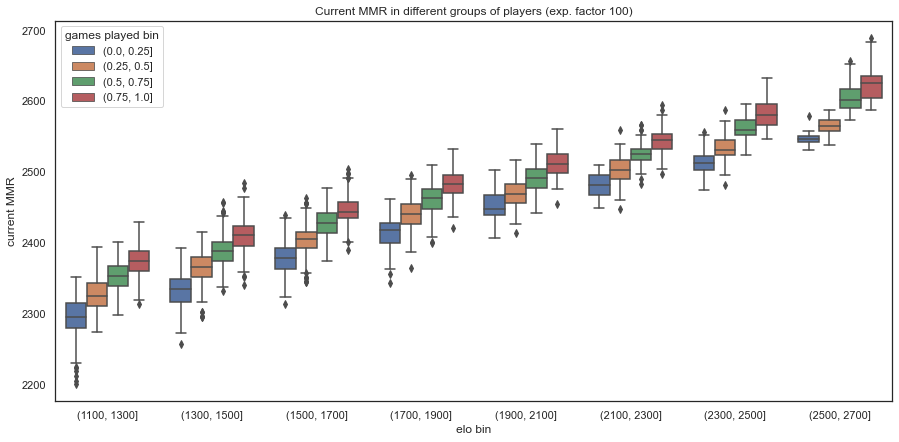

In [4]:
sns.set_theme(style="white")
sns.boxplot(
    x="elo bin", y="current MMR", hue="games played bin", data=df,
).set_title(f"Current MMR in different groups of players (exp. factor {experience_factor})")
plt.savefig(f"./images/elo_vs_currentMMR_experience_factor_{experience_factor}.png")
plt.savefig(f"./images/elo_vs_currentMMR_experience_factor_{experience_factor}.svg")
plt.show()

In [5]:
players_per_group = df.groupby(["elo bin", "games played bin"]).agg(count=pd.NamedAgg("player", "count"),
                                                                    peak_mmr_avg = pd.NamedAgg("peak MMR", "mean"),
                                                                    peak_mmr_std = pd.NamedAgg("peak MMR", "std"),
                                                                    current_mmr_avg = pd.NamedAgg("current MMR", "mean"),
                                                                    current_mmr_std = pd.NamedAgg("current MMR", "std"),)
players_per_group

count  peak_mmr_avg  peak_mmr_std  \
elo bin      games played bin                                      
(1100, 1300] (0.0, 0.25]         617   2402.064146      3.795862   
             (0.25, 0.5]         421   2402.270003      3.981238   
             (0.5, 0.75]         388   2403.899112      5.315027   
             (0.75, 1.0]         295   2409.771834      9.235281   
(1300, 1500] (0.0, 0.25]         571   2406.050321      6.560186   
             (0.25, 0.5]         512   2410.368044      8.707014   
             (0.5, 0.75]         513   2419.686757     11.571852   
             (0.75, 1.0]         536   2435.918428     14.394696   
(1500, 1700] (0.0, 0.25]         328   2418.289121     10.534984   
             (0.25, 0.5]         412   2432.150415     12.565185   
             (0.5, 0.75]         443   2448.159748     13.986138   
             (0.75, 1.0]         452   2468.305750     14.317814   
(1700, 1900] (0.0, 0.25]         230   2440.802698     13.084585   
             (0.25, 0.5]         317   2459.760862     14.393627   
             (0.5, 0.75]         324   2478.631967     15.133924   
             (0.75, 1.0]         334   2499.024453     14.787879   
(1900, 2100] (0.0, 0.25]         126   2468.368873     15.354634   
             (0.25, 0.5]         192   2487.216469     14.789612   
             (0.5, 0.75]         148   2508.892344     14.932425   
             (0.75, 1.0]         199   2527.361771     14.917915   
(2100, 2300] (0.0, 0.25]          65   2495.739103     13.551462   
             (0.25, 0.5]          89   2515.568193     15.612800   
             (0.5, 0.75]          97   2538.542346     13.354030   
             (0.75, 1.0]         125   2558.733257     16.270229   
(2300, 2500] (0.0, 0.25]          28   2522.651252     16.553877   
             (0.25, 0.5]          58   2545.758859     15.229611   
             (0.5, 0.75]          40   2570.931814     16.108099   
             (0.75, 1.0]          53   2592.222661     18.277948   
(2500, 2700] (0.0, 0.25]          12   2552.291194     10.151587   
             (0.25, 0.5]          22   2576.967241     14.974111   
             (0.5, 0.75]          19   2615.517617     27.296655   
             (0.75, 1.0]          34   2639.068599     22.333082   

                               current_mmr_avg  current_mmr_std  
elo bin      games played bin                                    
(1100, 1300] (0.0, 0.25]           2294.853533        25.227999  
             (0.25, 0.5]           2326.648996        22.043486  
             (0.5, 0.75]           2351.414635        19.645397  
             (0.75, 1.0]           2374.277372        20.855766  
(1300, 1500] (0.0, 0.25]           2333.040764        23.146143  
             (0.25, 0.5]           2364.265563        21.856074  
             (0.5, 0.75]           2388.666715        20.787330  
             (0.75, 1.0]           2410.436133        21.627871  
(1500, 1700] (0.0, 0.25]           2377.078933        22.765753  
             (0.25, 0.5]           2402.799981        21.450086  
             (0.5, 0.75]           2426.205850        19.798799  
             (0.75, 1.0]           2446.086783        19.552778  
(1700, 1900] (0.0, 0.25]           2415.032442        20.146031  
             (0.25, 0.5]           2438.670105        20.501862  
             (0.5, 0.75]           2460.252294        20.320539  
             (0.75, 1.0]           2482.240886        18.932940  
(1900, 2100] (0.0, 0.25]           2450.297400        19.083421  
             (0.25, 0.5]           2471.213402        18.704726  
             (0.5, 0.75]           2492.081913        18.175418  
             (0.75, 1.0]           2511.505991        17.941977  
(2100, 2300] (0.0, 0.25]           2480.496591        16.574256  
             (0.25, 0.5]           2502.510841        19.492799  
             (0.5, 0.75]           2524.125113        15.645631  
             (0.75, 1.0]           2543.214794        19.278528  
(2

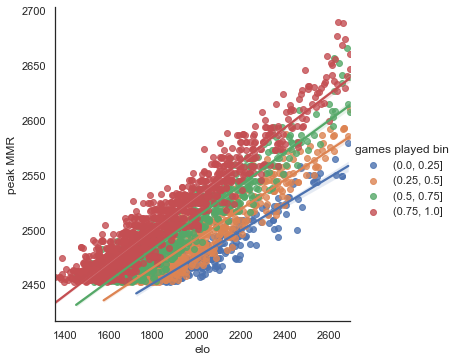

In [6]:
sns.lmplot(x="elo", y="peak MMR", hue="games played bin", data=df[df["rank"] < 2860])
#.set_title("Initial ELO (skill) vs peak MMR (top 2860)")
plt.show()

In [7]:
df["skill_rank"] = df["elo"].rank(ascending=False)
df["rank (delta)"] = df["rank"] - df["skill_rank"]
df

,player,elo,playrate,games played,current MMR,peak MMR,win rate,rank,elo bin,games played percentile,games played bin,rank bin,skill_rank,rank (delta)
8,Player 8,1256.142857,4,69,2329.993906,2414.141336,42.028986,5222.0,"(1100, 1300]",0.232813,"(0.0, 0.25]","(5200, 5400]",6794.5,-1572.5
25,Player 25,1278.142857,1,43,2272.353615,2400.000000,27.906977,7484.5,"(1100, 1300]",0.031563,"(0.0, 0.25]","(7400, 7600]",6535.5,949.0
37,Player 37,1232.142857,7,66,2308.354000,2400.160046,39.393939,6845.0,"(1100, 1300]",0.205437,"(0.0, 0.25]","(6800, 7000]",7086.0,-241.0
49,Player 49,1285.142857,2,53,2314.874285,2403.095264,37.735849,6421.0,"(1100, 1300]",0.092438,"(0.0, 0.25]","(6400, 6600]",6466.0,-45.0
64,Player 64,1228.142857,5,61,2288.231585,2400.000000,36.065574,7484.5,"(1100, 1300]",0.159375,"(0.0, 0.25]","(7400, 7600]",7125.0,359.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,Player 6837,2540.857143,13,130,2601.535009,2621.272243,60.769231,39.0,"(2500, 2700]",0.846875,"(0.75, 1.0]","(0, 200]",69.0,-30.0
6861,Player 6861,2610.000000,18,141,2633.147241,2652.044285,62.411348,12.0,"(2500, 2700]",0.946500,"(0.75, 1.0]","(0, 200]",42.0,-30.0
6926,Player 6926,2584.857143,14,135,2635.266406,2635.266406,62.222222,22.0,"(2500, 2700]",0.895188,"(0.75, 1.0]","(0, 200]",49.5,-27.5
7420,Player 7420,2663.000000,16,134,2667.985872,2668.769108,64.179104,5.0,"(2500, 2700]",0.885625,"(0.75, 1.0]","(0, 200]",17.0,-12.0
